In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt


In [2]:

data = pd.read_csv("train.csv")

In [3]:

print("info:")
print(data.info)

print("head:")
print(data.head())

print("tail:")
print(data.tail())

print("describe:")
print(data.describe())

info:
<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                             

In [4]:

print("!!!!!!!!!!!!!!!!!  PART 2  !!!!!!!!!!!!!!!!!")
label_encoder = preprocessing.LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
print(data['Sex'])

!!!!!!!!!!!!!!!!!  PART 2  !!!!!!!!!!!!!!!!!
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [5]:
print("!!!!!!!!!!!!!!!!!  PART 3  !!!!!!!!!!!!!!!!!")
print(data.isna().sum())
# data=data.fillna(data.mean())

data['Age'] = data['Age'].fillna(data['Age'].mean()) # fill with mean
data = data.drop("Cabin", axis=1) #delete Cabin columns
data['Embarked'] = data['Embarked'].fillna(0) # fill with mean
# print(data['Cabin'].tail())

print(data.isna().sum())


!!!!!!!!!!!!!!!!!  PART 3  !!!!!!!!!!!!!!!!!
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


مزایا و معایب روش پر کردن سلول‌ها با مقدار میانگین
معایب: ۲-می‌تواند تاثیر زیادی در مرکز نمودار PDF داشته باشد. (به علت زیاد شدن داده‌های برابر میانگین) ۲-ممکن است داده ما گسسسته باشد یا هر عدد معنای خاصی داشته باشد. در این صورت میانگین می‌تواند بی‌معنا باشد
مزایا: ۱-محاسبه‌اش راحت است ۲-میانگین جامعه را به صورت کلی به خوبی نشان می‌دهد.

In [6]:
print("!!!!!!!!!!!!!!!!!  PART 5  !!!!!!!!!!!!!!!!!")
# print("female count:  " + str(data['Sex'].value_counts(0)))
# print("male count:  "+ str(data['Sex'].value_counts(1)))
# print(data["Sex"].value_counts())
print("female count:  " + str(data[data.Sex == 0].shape[0]))
print("male count:  " + str(data[data.Sex == 1].shape[0]))
print("male boarded Southampton:  " + str(data.value_counts(["Sex", "Embarked"])[1][0]))
# print(data.value_counts(["Sex", "Embarked"])[1][0])


!!!!!!!!!!!!!!!!!  PART 5  !!!!!!!!!!!!!!!!!
female count:  314
male count:  577
male boarded Southampton:  441


In [7]:
print("!!!!!!!!!!!!!!!!!  PART 6  !!!!!!!!!!!!!!!!!")
print("passengers above 35 with ticket type 3 and with no company:  " + str(
    data.loc[(data['Age'] > 35) & (data['Pclass'] == 3) & (data['SibSp'] == 0) & (data['Parch'] == 0)].shape[0]))


!!!!!!!!!!!!!!!!!  PART 6  !!!!!!!!!!!!!!!!!
passengers above 35 with ticket type 3 and with no company:  41


In [8]:
print("!!!!!!!!!!!!!!!!!  PART 7  !!!!!!!!!!!!!!!!!")
import time
start = time.time()
print(data.loc[(data['Embarked'] == 'Q')]['Fare'].mean())
end = time.time()
print("Execution time: " + str(end - start))

!!!!!!!!!!!!!!!!!  PART 7  !!!!!!!!!!!!!!!!!
13.276029870129872
Execution time: 0.001837015151977539


In [9]:
print("!!!!!!!!!!!!!!!!!  PART 8  !!!!!!!!!!!!!!!!!")
count=0
sum=0
start = time.time()
for index,row in data.iterrows():
    if row['Embarked']=='Q':
        count+=1
        sum+=row['Fare']
print(sum/count)
end = time.time()
print("Execution time: " + str(end - start))

!!!!!!!!!!!!!!!!!  PART 8  !!!!!!!!!!!!!!!!!
13.276029870129872
Execution time: 0.05957841873168945


!!!!!!!!!!!!!!!!!  PART 9  !!!!!!!!!!!!!!!!!


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

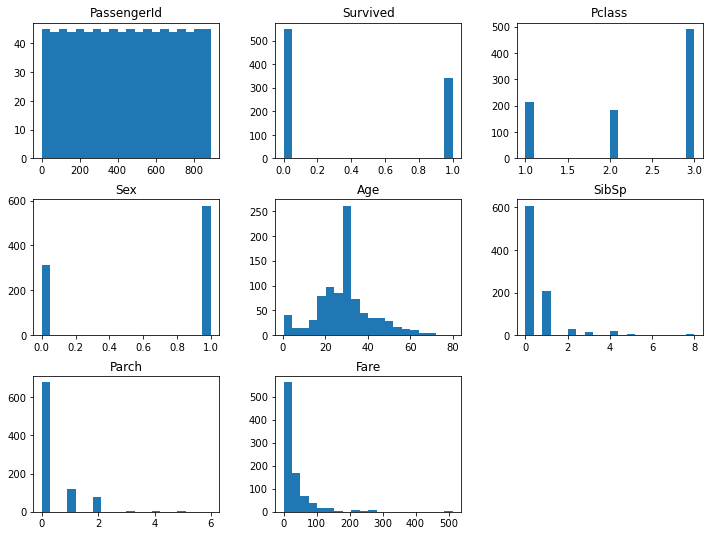

In [10]:
print("!!!!!!!!!!!!!!!!!  PART 9  !!!!!!!!!!!!!!!!!")
data.hist(bins=20, grid=False, figsize=(12,9))
# df=pd.DataFrame(data)
# df.hist()
# df.hist(column='Sex')
# df.hist(column='PassengerId')
# df.hist(column='Survived')
# df.hist(column='Pclass')
# df.hist(column='Parch')
# df.hist(column='Fare')
# df.hist(column='SibSp')


!!!!!!!!!!!!!!!!!  PART 10  !!!!!!!!!!!!!!!!!


/tmp/ipykernel_13809/3809444320.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_data=(data-data.mean())/data.std()


              Age Embarked      Fare Name     Parch  PassengerId    Pclass  \
0   -5.921480e-01      NaN -0.502163  NaN -0.473408    -1.729137  0.826913   
1    6.384304e-01      NaN  0.786404  NaN -0.473408    -1.725251 -1.565228   
2   -2.845034e-01      NaN -0.488580  NaN -0.473408    -1.721365  0.826913   
3    4.076970e-01      NaN  0.420494  NaN -0.473408    -1.717480 -1.565228   
4    4.076970e-01      NaN -0.486064  NaN -0.473408    -1.713594  0.826913   
..            ...      ...       ...  ...       ...          ...       ...   
886 -2.075923e-01      NaN -0.386454  NaN -0.473408     1.713594 -0.369158   
887 -8.228815e-01      NaN -0.044356  NaN -0.473408     1.717480 -1.565228   
888  4.371893e-15      NaN -0.176164  NaN  2.007806     1.721365  0.826913   
889 -2.845034e-01      NaN -0.044356  NaN -0.473408     1.725251 -1.565228   
890  1.769635e-01      NaN -0.492101  NaN -0.473408     1.729137  0.826913   

          Sex     SibSp  Survived Ticket  
0    0.737281  0.432

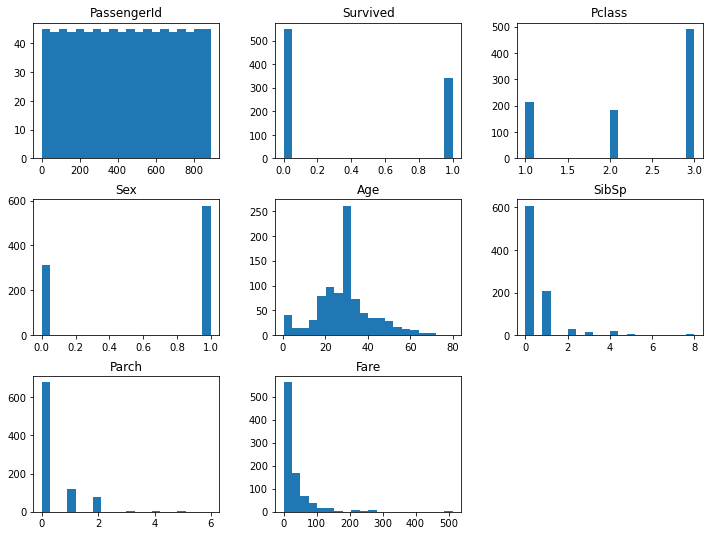

In [11]:
print("!!!!!!!!!!!!!!!!!  PART 10  !!!!!!!!!!!!!!!!!")
normalized_data=(data-data.mean())/data.std()
data.hist(bins=20, grid=False, figsize=(12,9))

print(normalized_data)

In [12]:
print("!!!!!!!!!!!!!!!!!  PART 11  !!!!!!!!!!!!!!!!!")
from scipy.stats import norm


survived_list = data[numeric_cols].loc[data['Survived']==1]
unsurvived_list = data[numeric_cols].loc[data['Survived']==0]


features = pd.DataFrame(
    {'survived_mean' : survived_list.mean(),
    'survived_std' : survived_list.std(),
    'unsurvived_mean' : unsurvived_list.mean(),
    'unsurvived_std' : unsurvived_list.std(),
    }
)

display(features)

x = np.arange(-5, 5, 0.01)

plt.rcParams["figure.figsize"] = (7,3)
for i, feature in features.iterrows():
    plt.title(feature.name)
    plt.plot(x, norm.pdf(x, feature['survived_mean'], feature['survived_std']), 'b')
    plt.plot(x, norm.pdf(x, feature['unsurvived_mean'], feature['unsurvived_std']), 'r')
    plt.show()


!!!!!!!!!!!!!!!!!  PART 11  !!!!!!!!!!!!!!!!!


NameError: name 'numeric_cols' is not defined

بیشترین تفاوت در بین دو نمودار sex و fare میباشد.
این دو نمودار میتوانند معیار مقایسه برای ما باشند.
که البته sex نمودار بهتری بنظر میرسد.

In [ ]:
print("!!!!!!!!!!!!!!!!!  PART 12  !!!!!!!!!!!!!!!!!")
test = pd.read_csv('test.csv')

feature_name = 'Sex'

test_temp = test.copy()
test_temp['Sex'].replace({'male':1, 'female':0}, inplace=True)
test_temp['Embarked'].replace({'C':0, 'Q':1, 'S': 2}, inplace=True)

normalized_test = test_temp[numeric_cols].apply(lambda iterator: (iterator - iterator.mean())/iterator.std())

train_radix_feature = features.loc[feature_name]

test_survived_pdf = norm.pdf(normalized_test[feature_name], train_radix_feature['survived_mean'], train_radix_feature['survived_std'])
test_unsurvived_pdf = norm.pdf(normalized_test[feature_name], train_radix_feature['unsurvived_mean'], train_radix_feature['unsurvived_std'])
test['Survived'] = np.where(test_survived_pdf > test_unsurvived_pdf, 1, 0)

test.to_csv('result.csv', index = False)

test
